# **Parkision Disease Prediction**



<img src='https://images.everydayhealth.com/images/neurology/parkinsons-disease/recognizing-the-progression-of-parkinsons-722x406.jpg'  width=450>

In [1]:
#import important library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
# prompt: import dataset and print head

data = pd.read_csv('/content/drive/MyDrive/dataset/Parkisons_disease_dataset/parkinsons.data')
data.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
X = data.drop('status', axis=1)
y = data['status']

# **Exploring and  Data analysis**

<img src='https://cdn.educba.com/academy/wp-content/uploads/2020/01/exploratory-data-analysis.jpg'  width=450>

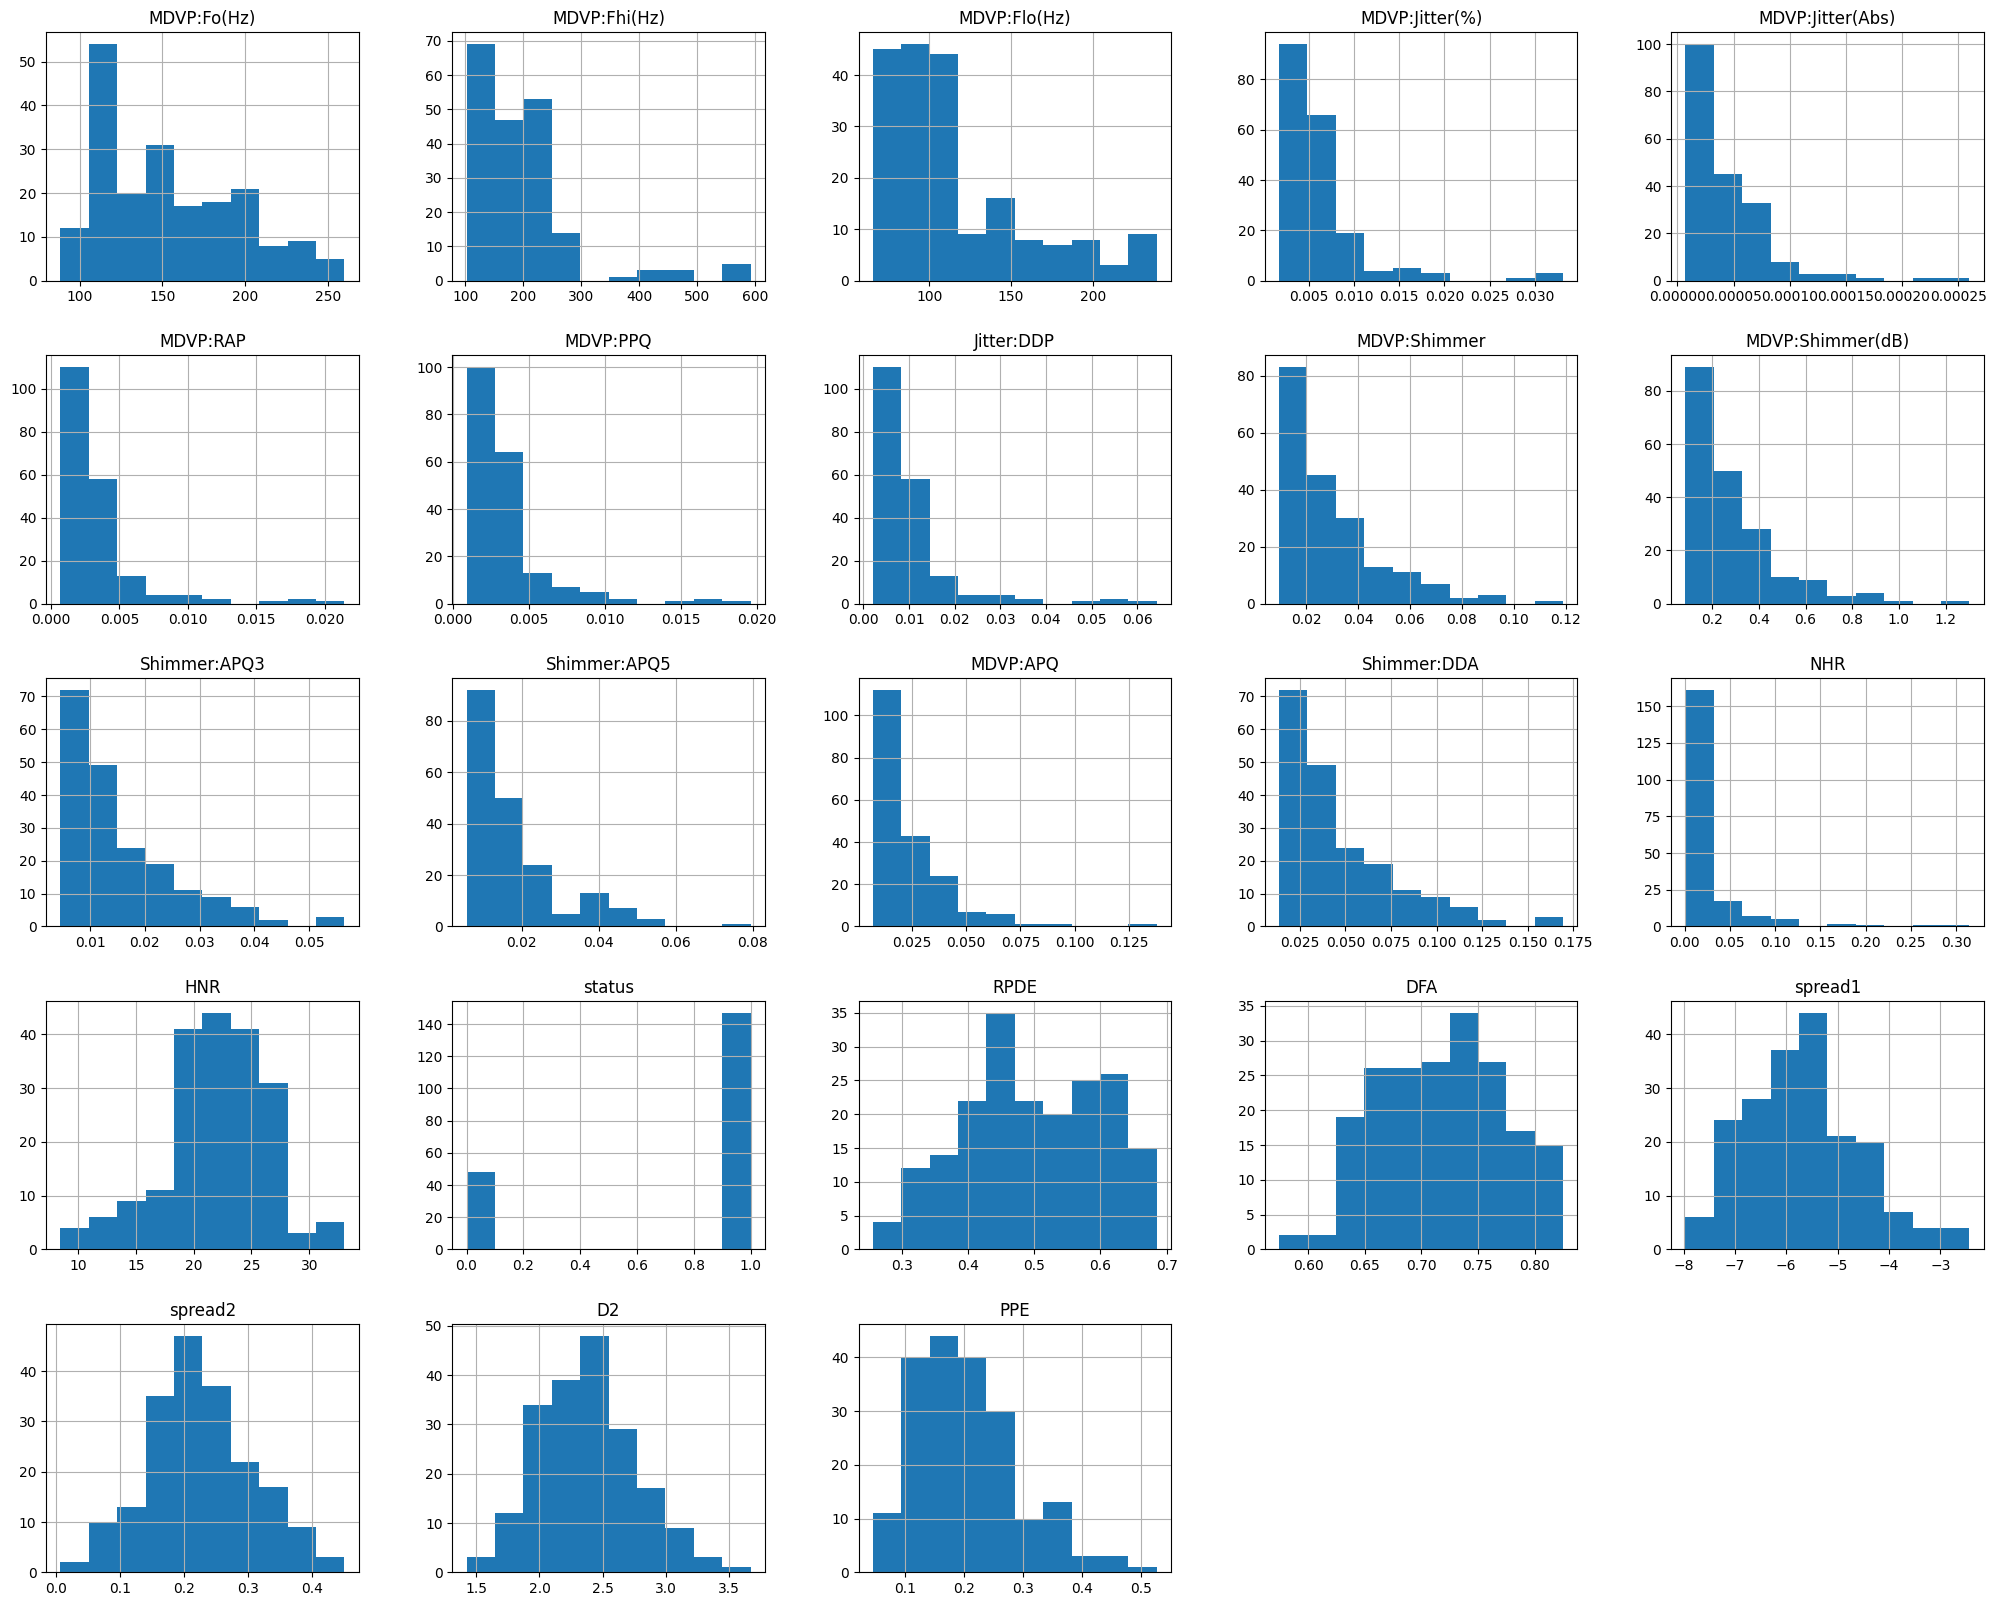

In [4]:
data.hist(figsize=(25,20));


<ipython-input-14-24f3dc69a5a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl=data.drop(columns='status').corr()


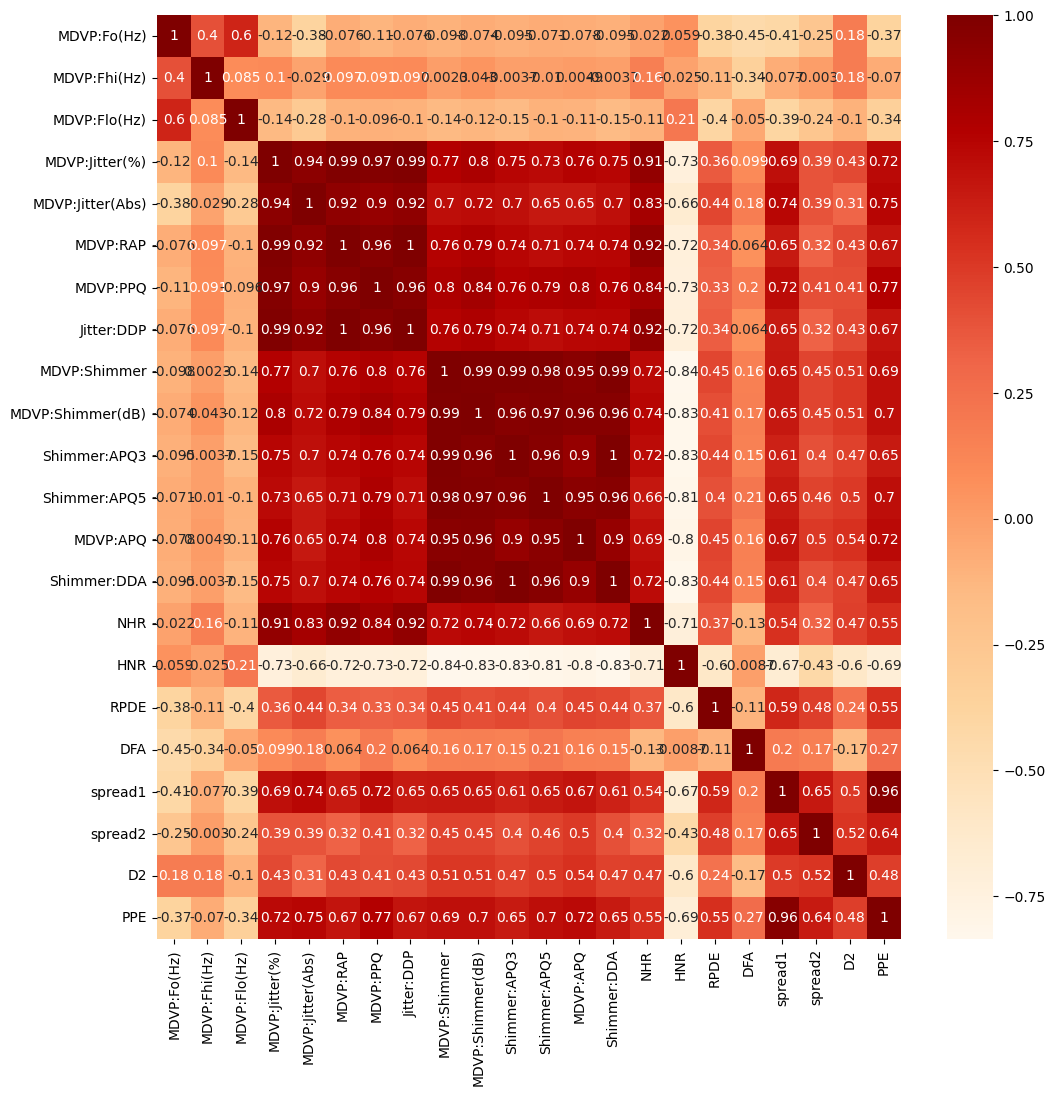

In [14]:
import seaborn as sns
correl=data.drop(columns='status').corr()
plt.figure(figsize=(12,12))
sns.heatmap(correl,annot=True,cmap='OrRd')
plt.show()

# **Use Pipeline and OneHotEncoder**

<img src='https://www.guidodiepen.nl/content/images/2021/02/pipeline.jpg'  width=400>
<img src='https://i.imgur.com/mtimFxh.png' width=400 >



In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Define preprocessing steps for numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# **Use Column- Transform**



  <img src="https://editor.analyticsvidhya.com/uploads/86630Machine%20Learning%20Pipeline.png" wdith=400>
  

In [7]:
from sklearn.compose import ColumnTransformer


# Combine the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# **Divided data into two part**

<img src="https://www.sharpsightlabs.com/wp-content/uploads/2022/05/train-test-split_simple-visual-example_v2.png"  width=400>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('status', axis=1), data['status'], test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['name'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [10]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9487179487179487
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



#**Confusion Matrics bold text**

 <img src="https://miro.medium.com/v2/resize:fit:667/1*3yGLac6F4mTENnj5dBNvNQ.jpeg" width=400>

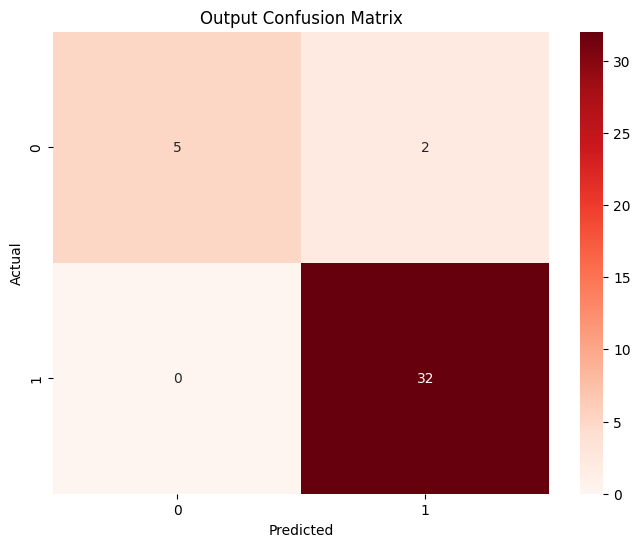

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix");




## ****Actual values vs Predict vlaues ***

In [12]:
pd.DataFrame({'actual':y_test,'predict':y_pred})

,actual,predict
138,1,1
16,1,1
155,1,1
96,1,1
68,1,1
153,1,1
55,1,1
15,1,1
112,1,1
111,1,1
